## Introduction

<img src="./assets/agent-definition.jpeg" alt="drawing" style="width:1000px;"/>


## Understasnding LLMs

### Tokenizers

<img src="./assets/question-received.jpeg" alt="drawing" style="width:1000px;"/>


<img src="./assets/tokenizer-schema.jpeg" alt="drawing" style="width:800px;"/>


### Embedding Space

<img src="./assets/ES1.png" alt="drawing" style="width:800px;"/>


<img src="./assets/ES2.png" alt="drawing" style="width:800px;"/>

### Attention Mechanism

<img src="./assets/llm-schema.jpeg" alt="drawing" style="width:1000px;"/>

<img src="./assets/Attention.png" alt="drawing" style="width:1000px;"/>

## Why LLMs Hallucinate

<img src="./assets/Halluc.png" alt="drawing" style="width:1000px;"/>

### Practical Example

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def sigmoid(X):
   return 1/(1+np.exp(-X))
class VanillaRNN():
  def __init__(self,size=8):
    # define size x size vector
    self.size=size
    self.memory_states=[]
    self.weigths=np.zeros((size*size,size*size))

  def set_memory_state(self,state):
    self.memory_states.append(state)

  def print_memory_states(self):
    total_memory=len(self.memory_states)
    fig, axs = plt.subplots(nrows=total_memory, ncols=1, figsize=(8, 6))
    for ax, memory_state in zip(axs, self.memory_states):
      vector_square=memory_state.reshape(self.size,self.size)
      ax.imshow(vector_square, cmap='gray')
    fig.show()

  def hebbian_learning(self):
    for m in self.memory_states:
        print('State Learned')
        m = np.where(m == 0, -1, m)
        outer_product = np.outer(m, m)
        np.fill_diagonal(outer_product, 0)

        self.weigths += outer_product
    self.weigths /= len(self.memory_states)

  @staticmethod
  def update_state(W, state):
    size = state.size
    new_state = state.copy()
    for i in range(size):
        weighted_sum = np.dot(W[i, :], state)
        new_state[i] = 1 if weighted_sum > 0 else -1
    return new_state

  def recall(self,initial_state):
    current_state = initial_state
    i=0
    while True:
        i+=1
        next_state = self.update_state(self.weigths, current_state)
        if np.array_equal(next_state, current_state):
            print('Convergence reached in',i,'iterations')
            break  # Convergence reached
        current_state = next_state
    return current_state

State Learned
State Learned
State Learned


/var/folders/db/hk4pr53504x2lk8kpgbxs6_c0000gn/T/ipykernel_4789/3911467420.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


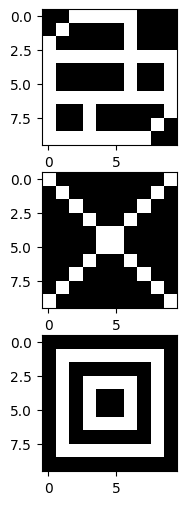

In [20]:
a = VanillaRNN(10)
a.set_memory_state(np.array([0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0]))
a.set_memory_state(np.array([1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1]))
a.set_memory_state(np.array([0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]))
a.hebbian_learning()
a.print_memory_states()

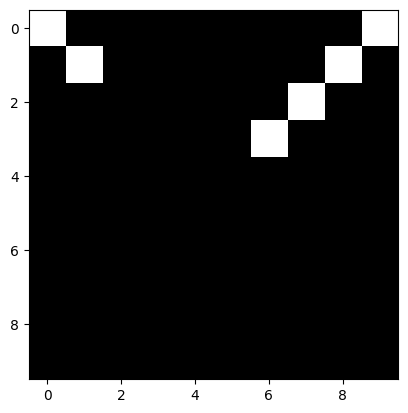

Convergence reached in 2 iterations


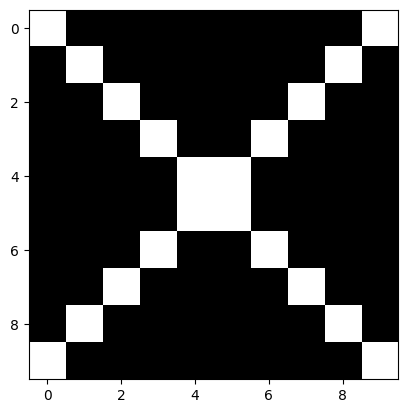

In [21]:
# Teste de Memoria
starting_state=np.array(
[1,0,0,0,0,0,0,0,0,1
,0,1,0,0,0,0,0,0,1,0
,0,0,0,0,0,0,0,1,0,0
,0,0,0,0,0,0,1,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0])
vector_square=starting_state.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()
stt=a.recall(starting_state)
vector_square=stt.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()

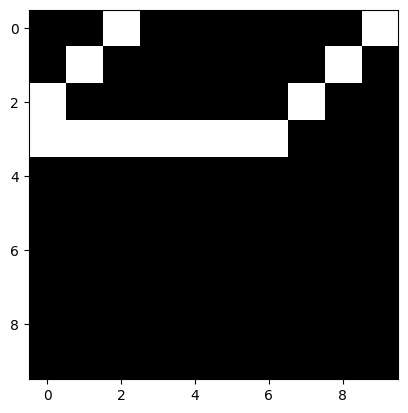

Convergence reached in 2 iterations


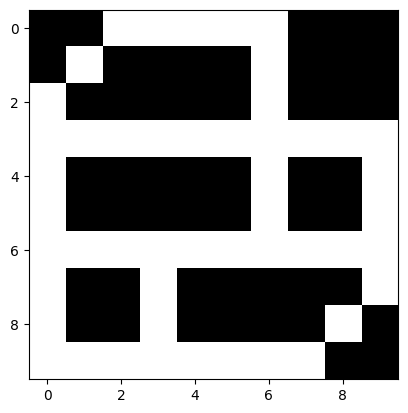

In [22]:
# Teste de Memoria
starting_state=np.array(
[0,0,1,0,0,0,0,0,0,1
,0,1,0,0,0,0,0,0,1,0
,1,0,0,0,0,0,0,1,0,0
,1,1,1,1,1,1,1,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0])
vector_square=starting_state.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()
stt=a.recall(starting_state)
vector_square=stt.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()

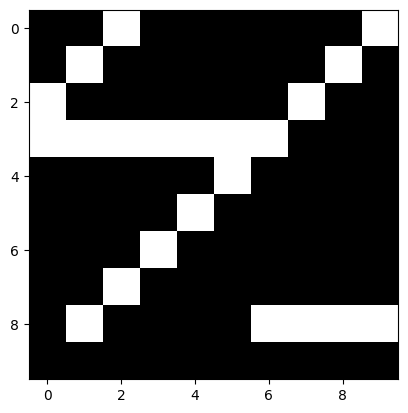

Convergence reached in 3 iterations


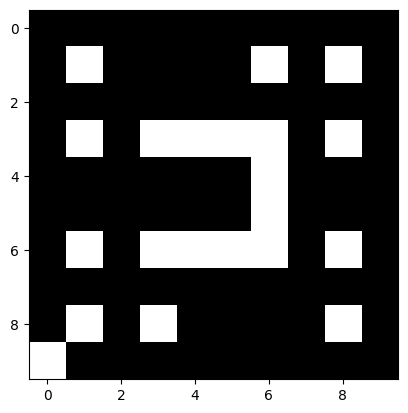

In [23]:
# Teste de Memoria
starting_state=np.array(
[0,0,1,0,0,0,0,0,0,1
,0,1,0,0,0,0,0,0,1,0
,1,0,0,0,0,0,0,1,0,0
,1,1,1,1,1,1,1,0,0,0
,0,0,0,0,0,1,0,0,0,0
,0,0,0,0,1,0,0,0,0,0
,0,0,0,1,0,0,0,0,0,0
,0,0,1,0,0,0,0,0,0,0
,0,1,0,0,0,0,1,1,1,1
,0,0,0,0,0,0,0,0,0,0])
vector_square=starting_state.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()
stt=a.recall(starting_state)
vector_square=stt.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()

## Agent

<img src="./assets/agent-tools.jpeg" alt="drawing" style="width:1000px;"/>


## Setup

### Langchain Components

<img src="./assets/langchain-components.jpeg" alt="drawing" style="width:800px;"/>


Installing dependencies

In [ ]:
# pip install pandas pydantic
# pip install langchain langchain_core langchain_openai langchain_community langgraph
# pip install bigquery google db-types
# pip install wikipedia serpapi google-search-results numexpr
# pip install PyPDF2 python-docx 

Loading ENV

In [24]:
## Loading the environment
import os

os.getenv('./env')

openAiApiKey = os.getenv('OPENAI_API_KEY')

Referencing the models

In [25]:
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings

light_model = ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=0,
    verbose=True
  )

powerful_model = ChatOpenAI(
    model="gpt-4-turbo-2024-04-09",
    temperature=0,
    verbose=True
  )


In [26]:
light_model.invoke("What is the capital of Brazil?")

AIMessage(content='Brasília', response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 14, 'total_tokens': 17}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_c2295e73ad', 'finish_reason': 'stop', 'logprobs': None})

In [27]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser


prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """
            You are a backend developer, and you are an expert in RUST.
         """),
        ("user", """
        Answer this question as best as you can: {question}
    """)]
)

parser = StrOutputParser()

chain = (
    prompt 
    | light_model 
    | parser
)

res = chain.invoke({"question": "How to multithread in rust?"})

res

'In Rust, multithreading can be achieved using the `std::thread` module. Here is a basic example of how to create and run multiple threads in Rust:\n\n1. Import the necessary module:\n```rust\nuse std::thread;\n```\n\n2. Define a function that will be executed by each thread:\n```rust\nfn thread_function(id: i32) {\n    println!("Thread {} is running", id);\n}\n```\n\n3. Create and run multiple threads:\n```rust\nfn main() {\n    let mut handles = vec![];\n\n    for i in 0..5 {\n        let handle = thread::spawn(move || {\n            thread_function(i);\n        });\n        handles.push(handle);\n    }\n\n    for handle in handles {\n        handle.join().unwrap();\n    }\n}\n```\n\nIn this example, we first define a function `thread_function` that takes an `i32` parameter and prints a message indicating the thread ID. Then, in the `main` function, we create a vector to store thread handles, iterate over a range of numbers to create multiple threads using `thread::spawn`, and push t

Memory Provider

In [28]:
from langchain.memory import ConversationBufferMemory


chat_history = ConversationBufferMemory(memory_key="chat_history")

## Data Extraction

### Documentos Internos Brick (Normal Chunking)

In [29]:
import requests
from bs4 import BeautifulSoup

main_page=requests.get('https://brickseguros.com.br')
soup = BeautifulSoup(main_page.content, 'lxml')
text=soup.get_text()
links=[]
for link in soup.find_all('a', href=True):
    if 'http' in link['href'] and 'brickseguros.com.br' in link['href'] and 'mailto' not in link['href'] and link['href']!='https://brickseguros.com.br' :
        links.append(link['href'])
links=list(set(links))

for link in links:
    page=requests.get(link)
    soup = BeautifulSoup(page.content, 'lxml')
    text+=soup.get_text()

brickdocuments=text

In [30]:
import PyPDF2

with open('documents/brick_bs_cg.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    policy_conditions=''
    for i in range(len(reader.pages)):
        policy_conditions+=reader.pages[i].extract_text()


### Circulares SUSEP (RAPTOR)

### First Extraction

In [31]:
from PyPDF2 import PdfReader
import io

def get_susep_doc(url):
    r=requests.get(url)
    reader = PdfReader(io.BytesIO(r.content))
    out_str=''
    for i in range(len(reader.pages)):
        out_str+=reader.pages[i].extract_text()
    return out_str

In [32]:
def get_gov_doc(url):
    r=requests.get(url)
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(r.text, 'html.parser')

    # Find the div with class 'texto-dou'
    target_div = soup.find('div', class_='texto-dou')

    if target_div:
        # Print the entire text content of the found div, including its children
        return target_div.get_text()
    else:
        print("No div with class 'texto-dou' found")

In [33]:
docs=[]
links_susep=[]
links_gov=[]
with open('documents/susep_links.txt') as f:
    for line in f:
        if line.startswith('https://www2.susep.gov.br'):
            links_susep.append(line.strip())
        else:
            links_gov.append(line.strip())


In [ ]:

from tqdm import tqdm

for item in tqdm(links_susep):
    try:
        docs.append(get_susep_doc(item))
    except:
        print('Error on',item)
for item in tqdm(links_gov):
    try:
        docs.append(get_gov_doc(item))
    except:
        print('Error on',item)

In [ ]:
for index,item in enumerate(docs):
    with open(f'documents/raw_susep/{index}.txt','w') as f:
        f.write(item)

### Extraction to index

In [34]:
susep_docs=[]
for file in os.listdir('documents/raw_susep'):
    with open(f'documents/raw_susep/{file}','r') as f:
        susep_docs.append(f.read())

### Código Civil (Multi Representation)

In [13]:
with open('documents/codcivil.html','r',encoding='utf-8') as f:
    soup = BeautifulSoup(f.read(), 'lxml')
#get all elements inside mais soup
elements = soup.find_all(recursive=False)[0].find_all(recursive=False)[0].find_all(recursive=False)
textelements=[x.get_text().strip() for x in elements]


In [14]:
livro=''
titulo=''
capitulo=''
secao=''
subsecao=''
outstr=''
lastwastext=False
codigo_civill=[]
for item in textelements:
    if item.startswith('LIVRO'):
        if lastwastext:
            codigo_civill.append(outstr)
        livro=item
        titulo=''
        capitulo=''
        secao=''
        subsecao=''
        outstr=''
        lastwastext=False
    elif item.startswith('TÍTULO'):
        if lastwastext:
            codigo_civill.append(outstr)
        titulo=item
        capitulo=''
        secao=''
        subsecao=''
        outstr=''
        lastwastext=False
    elif item.startswith('CAPÍTULO'):
        if lastwastext:
            codigo_civill.append(outstr)
        capitulo=item
        secao=''
        subsecao=''
        outstr=''
        lastwastext=False
    elif item.startswith('Seção'):
        if lastwastext:
            codigo_civill.append(outstr)
        secao=item
        subsecao=''
        outstr=''
        lastwastext=False
    elif item.startswith('SUBSEÇÃO'):
        if lastwastext:
            codigo_civill.append(outstr)
        subsecao=item
        outstr=''
        lastwastext=False
    else:
        if not lastwastext:
            outstr+=f'{livro} - {titulo} - {capitulo} - {secao} - {subsecao}\n'
        lastwastext=True
        outstr += item+'\n'


## Indexing

### Brick

In [35]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, 
    chunk_overlap=50, 
    separators=["#######", "\n", "\r\n", "\r"],
)

texts = text_splitter.split_text(brickdocuments)
documents = text_splitter.create_documents(texts)
print(len(documents))
db = Chroma.from_documents(documents, OpenAIEmbeddings(
),collection_name='brick_general')

brick_general_retriever = db.as_retriever(collection_name='brick_general')

71


In [36]:

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, 
    chunk_overlap=50, 
    separators=["#######", "\n", "\r\n", "\r"],
)

texts = text_splitter.split_text(policy_conditions)
documents = text_splitter.create_documents(texts)
print(len(documents))
db2 = Chroma.from_documents(documents, OpenAIEmbeddings(
),collection_name='insurance_brick')

brick_insurance_retriever = db2.as_retriever(collection_name='insurance_brick')

320


### SUSEP

In [37]:
texts='#####################################'.join(susep_docs)
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, 
    chunk_overlap=50, 
    separators=["#######", "\n", "\r\n", "\r"],
)

texts = text_splitter.split_text(texts)
documents = text_splitter.create_documents(texts)
print(len(documents))
db = Chroma.from_documents(documents, OpenAIEmbeddings(
),collection_name='susep')

brick_susep_retriever = db.as_retriever(collection_name='susep')

2125


### Código civil

Tokenizing

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
import json
from langchain_core.documents import Document


chain = (
    {"doc": lambda x: x.page_content}
    | ChatPromptTemplate.from_template("Summarize os seguintes documentos::\n\n{doc}")
    | light_model
    | StrOutputParser()
)
docs=[Document(x) for x in codigo_civill]
summaries = chain.batch(docs, {"max_concurrency": 5})

with open('cod_civil_summaries.json','w') as f:
    json.dump(summaries, f)

Loading Tokenized Civil Code

In [38]:
import json

# Load the summaries
with open('cod_civil_summaries.json','r') as f:
    summaries=json.load(f)


In [39]:
from langchain.storage import InMemoryByteStore
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_core.documents import Document
import uuid

docs=[Document(x) for x in codigo_civill]
# The vectorstore to use to index the child chunks
vectorstore_cc = Chroma(collection_name="summaries",
                     embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryByteStore()
id_key = "doc_id"

# The retriever
retriever_cc = MultiVectorRetriever(
    vectorstore=vectorstore_cc,
    byte_store=store,
    id_key=id_key,
    search_kwargs={"k": 3}

)
doc_ids = [str(uuid.uuid4()) for _ in docs]

# Docs linked to summaries
summary_docs = [
    Document(page_content=s, metadata={id_key: doc_ids[i]})
    for i, s in enumerate(summaries)
]

# Add
retriever_cc.vectorstore.add_documents(summary_docs)
retriever_cc.docstore.mset(list(zip(doc_ids, docs)))

## Tools

### File Reading

In [40]:
from langchain_core.tools import tool
import PyPDF2
import docx
import json

@tool
def read_txt_file(file: str):
    """
        This tool reads a text file and returns its content.
        It receives the file path as input.
    """
    try:
        with open(file, 'r') as f:
            return {
                "content": f.read(),
                "error": None,
                "file": file
            }
    except Exception as e:
        return {
            "content": None,
            "error": str(e),
            "file": file
        }

@tool
def read_docx_file(file):
    """
        This tool reads a docx file and returns its content.
        It receives the file path as input.
    """

    try:
        doc = docx.Document(file)
        fullText = []
        for para in doc.paragraphs:
            fullText.append(para.text)
        return {
            "content": '\n'.join(fullText),
            "error": None,
            "file": file
        }
        # return {
        #     "content": "NOT SUPORTED YET!",
        #     "error": None,
        #     "file": file
        # }
    except Exception as e:
        return {
            "content": None,
            "error": str(e),
            "file": file
        }

@tool
def read_pdf_file(file):
    """
        This tool reads a pdf file and returns its content.
        It receives the file path as input.
    """

    try :
        with open(file, 'rb') as f:
            pdf = PyPDF2.PdfReader(f)
            fullText = []
            for page_num in range(len(pdf.pages)):
                page = pdf.pages[page_num]
                fullText.append(page.extract_text())
            return {
                "content": '\n'.join(fullText),
                "error": None,
                "file": file
            }
    except Exception as e:
        return {
            "content": None,
            "error": str(e),
            "file": file
        }
@tool
def read_md_file(file):
    """
        This tool reads a markdown file and returns its content.
        It receives the file path as input.
    """

    try:
        with open(file, 'r') as f:
            return {
                "content": f.read(),
                "error": None,
                "file": file
            }
    except Exception as e:
        return {
            "content": None,
            "error": str(e),
            "file": file
        }
    
@tool 
def read_html_file(file):
    """
        This tool reads a html file and returns its content.
        It receives the file path as input.
    """

    try:
        with open(file, 'r') as f:
            return {
                "content": f.read(),
                "error": None,
                "file": file
            }
    except Exception as e:
        return {
            "content": None,
            "error": str(e),
            "file": file
        }
    
@tool
def read_json_file(file):
    """
        This tool reads a json file and returns its content.
        It receives the file path as input.
    """

    try:
        with open(file, 'r') as f:
            return {
                "content": json.load(f),
                "error": None,
                "file": file
            }
    except Exception as e:
        return {
            "content": None,
            "error": str(e),
            "file": file
        }
    
read_txt_file('./files/inputs.txt')

{'content': '\nLocadora XPTY - Forms\n\nFormulário para Cadastro de motoristas do vendedor Guilherme \n\nCor: #00FF00\nEntidade: PF',
 'error': None,
 'file': './files/inputs.txt'}

### Chart Plotting

In [ ]:
from langchain_core.tools import tool
from typing import List
import matplotlib.pyplot as plt
      
@tool
def plot_bar_chart(
      labels: List,
      values: List,
      title: str,
      x_label: str,
      y_label: str
):
      """
            This tool plots a bar chart. 
          
      """
      try:

            if (labels is None):
                  return {
                        "message": "O campo labels não pode ser nulo. Envie em um formato válido."
                  }

            if(values is None):
                  return {
                        "message": "O campo values não pode ser nulo. Envie em um formato válido."
                  }
            

            # Plotting the bar chart
            plt.bar(labels, values)
            plt.xlabel(x_label)
            plt.ylabel(y_label)
            plt.title(title)
            plt.show()
      except Exception as error:
        return {
             "message": "Tente formatar novamente os dados",
            "error": error
        }
      

@tool
def plot_line_chart(
      labels: List,
      values: List,
      title: str,
      x_label: str,
      y_label: str
):
      """
            This tool plots a line chart. 
          
      """
      try:

            if (labels is None):
                  return {
                        "message": "O campo labels não pode ser nulo. Envie em um formato válido."
                  }

            if(values is None):
                  return {
                        "message": "O campo values não pode ser nulo. Envie em um formato válido."
                  }
            

            # Plotting the line chart
            plt.plot(labels, values)
            plt.xlabel(x_label)
            plt.ylabel(y_label)
            plt.title(title)
            plt.show()
      except Exception as error:
        return {
             "message": "Tente formatar novamente os dados",
            "error": error
        }

### Brick Related Questions

#### RAG - Retrieval-Augmented Generation

<img src="./assets/basic-rag.jpeg" alt="drawing" style="width:800px;"/>

#### Implementation

In [48]:
# Prompt
brick_internal_rag_prompt = """
        Your name is Brick AI.
        You work for a company called Brick Seguros - it helps fleet operators to manage thir risks.
        You are here to help the user with his questions.
        You are an expert in the field of fleets.
        Answer the user's question as best as you can based on the context below.
        Be concise and clear. Be direct and to the point.
        Question: {question}
        Context: {context}
    """

In [51]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from operator import itemgetter

# Chain
def brick_internal_chain(question):

    parser = StrOutputParser()
    prompt = ChatPromptTemplate.from_template(brick_internal_rag_prompt)
    chain = (
        {"context": itemgetter("question") | brick_general_retriever, "question": itemgetter("question")} |
        prompt |
        light_model |
        parser
    )

    result = chain.invoke({
        "question": question
    })

    return result

# brick_internal_chain('Quais os produtos da Brick?')
brick_general_retriever.invoke("Quais os produtos da Brick?")

[Document(page_content='Saiba Mais\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEstamos construindo o ecossistema de segurança para frotas, tijolo por tijolo.  \n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\nFaça parte do nosso ecossistema \n\n\n\n \n\n \n\n \n\n \n\n\n\n\n\n\n\n\n\nO que falam da Brick na  mídia \n\n\n\n\n \n\n\n\n\n\n\n\n\nEmpresas que usam Brick'),
 Document(page_content='Entre em contato com um de nossos especialistas e descubra como a Brick pode fazer a diferença na sua locadora.\n\nQuero conhecer o ecossistema Brick\n\n\n\n\n\n\nDeixe um comentário Cancelar respostaO seu endereço de e-mail não será publicado. Campos obrigatórios são marcados com *Comentário * Nome * \nE-mail * \nSite \n Salvar meus dados neste navegador para a próxima vez que eu comentar.\n \n\n \n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n \n\n\nInstagram\n \n\n\n\nLinkedin\n \n\n\n\nWhatsapp\n \n\n\n\n\n\n\n\n\nContato'),
 Document(page_content='Quero conhecer o ecossistema Brick\n\n\n\n\n\n\nDeixe um c

In [ ]:
@tool
def brick_internal_rag_tool(
    question: str
):
    """
        This tool retrieves answers for a questions about Brick Seguros.
    """

    try:
        return brick_internal_chain(question)
    except Exception as error:
        return str(error)

### Insurance Questions

#### RAG at Scale

<img src="./assets/rag-schema.jpeg" alt="drawing" style="width:800px;"/>

**Routing or Adaptive RAG**
- Semantic Routing

https://arxiv.org/abs/2403.14403

**Query Translation**
- RAG-Fusion

https://towardsdatascience.com/forget-rag-the-future-is-rag-fusion-1147298d8ad1

#### Implementation

<img src="./assets/insurance-graph.jpeg" alt="drawing" style="width:600px;"/>
<img src="./assets/rag-fusion.jpeg" alt="drawing" style="width:600px;"/>

In [ ]:
## Creating the state

from pydantic import BaseModel
from typing import List, Optional, TypedDict

## Defining the graph state
class InsuranceQuestionGraphState(TypedDict):
    # Input
    question: str

    # Internal
    errors: Optional[List[str]] = []

    # Output
    result: Optional[str] = None

In [ ]:
### Defining the routing node
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import ChatPromptTemplate


def routing_node(state):
    insurance_routing_message = """
        You are an expert at routing a user question.
        You work for a company called Brick Seguros - it helps fleet operators to manage their risks.
        You are very knowledgeable about the field of insurance.
        You are a specialist in identifying if the question is related to Brick insurance product or to general insurance legislation.
        Answer the user's question with a json response.
        ----
        Json structure:
            - result: boolean (true if the question is related to Brick insurance product, false if it is related to general insurance legislation)
        ----
        Question: {question}
    """

    prompt = ChatPromptTemplate.from_template(insurance_routing_message)

    question_router = prompt | light_model | JsonOutputParser()

    router = question_router.invoke({"question": state["question"]})

    if router["result"]:
        return "brick"
    else:
        return "general"

In [ ]:
from langchain.load import dumps, loads

def reciprocal_rank_fusion(results: list[list], k=60):
    """ Reciprocal_rank_fusion that takes multiple lists of ranked documents 
        and an optional parameter k used in the RRF formula """
    
    # Initialize a dictionary to hold fused scores for each unique document
    fused_scores = {}

    # Iterate through each list of ranked documents
    for docs in results:
        # Iterate through each document in the list, with its rank (position in the list)
        for rank, doc in enumerate(docs):
            # Convert the document to a string format to use as a key (assumes documents can be serialized to JSON)
            doc_str = dumps(doc)
            # If the document is not yet in the fused_scores dictionary, add it with an initial score of 0
            if doc_str not in fused_scores:
                fused_scores[doc_str] = 0
            # Retrieve the current score of the document, if any
            previous_score = fused_scores[doc_str]
            # Update the score of the document using the RRF formula: 1 / (rank + k)
            fused_scores[doc_str] += 1 / (rank + k)

    # Sort the documents based on their fused scores in descending order to get the final reranked results
    reranked_results = [
        (loads(doc), score)
        for doc, score in sorted(fused_scores.items(), key=lambda x: x[1], reverse=True)
    ]

    # Return the reranked results as a list of tuples, each containing the document and its fused score
    return reranked_results

In [ ]:
### Defining the brick node

from langchain_core.output_parsers import StrOutputParser
from operator import itemgetter


def brick_node(state):
    # RAG-Fusion template
    rag_fusion_template = """You are a helpful assistant that generates multiple search queries based on a single input query. \n
    You work for a company called Brick Seguros - it helps fleet operators to manage their risks.
    Generate multiple search queries related to: {question} \n
    Remember to be concise and clear. Be direct and to the point. \n
    Remember that they should be related to Brick Seguros Insurance product.
    Output (3 queries):"""
    prompt_rag_fusion = ChatPromptTemplate.from_template(rag_fusion_template)

    custom_parser = StrOutputParser() | (lambda x: x.split("\n"))

    generate_queries = (
        prompt_rag_fusion 
        | light_model
        | custom_parser ### This is a custom function that splits the output by new lines
    )

    retrieval_chain_rag_fusion = generate_queries | brick_insurance_retriever.map() | reciprocal_rank_fusion

    brick_insurance_product_template = """
    Your name is Brick AI. \n
    You work for a company called Brick Seguros - it helps fleet operators to manage thir risks. \n
    You are here to help the user with his questions. \n
    You are an expert in the field of fleets. \n
    Answer the user's question as best as you can based on the context below. \n
    Be concise and clear. Be direct and to the point. \n
    Context: {context}
    Question: {question}
    """

    prompt = ChatPromptTemplate.from_template(brick_insurance_product_template)

    final_rag_chain = (
        {"context": retrieval_chain_rag_fusion, 
        "question": itemgetter("question")} 
        | prompt
        | light_model
        | StrOutputParser()
    )

    res = final_rag_chain.invoke({"question": state["question"] })

    return  {
        "result": res,
        "errors": None,
        "question": state["question"]
    }

brick_node(InsuranceQuestionGraphState(question="Quais as coberturas do seu produto de seguro?"))


In [ ]:
### Defining the general node

def general_node(state):
    # RAG-Fusion template
    rag_fusion_susep_template = """You are a helpful assistant that generates multiple search queries based on a single input query. \n
    You work for a company called Brick Seguros - it helps fleet operators to manage their risks.
    Generate multiple search queries related to: {question} \n
    Remember to be concise and clear. Be direct and to the point. \n
    Remember that they should be related to general insurance legislation.
    Output (3 queries):"""
    prompt_general_rf_template = ChatPromptTemplate.from_template(rag_fusion_susep_template)

    custom_parser = StrOutputParser() | (lambda x: x.split("\n"))

    susep_generate_queries = (
        prompt_general_rf_template 
        | light_model
        | custom_parser ### This is a custom function that splits the output by new lines
    )

    susep_chain = susep_generate_queries | brick_susep_retriever.map() | reciprocal_rank_fusion

    susep_template = """
    Your name is Brick AI. \n
    You work for a company called Brick Seguros - it helps fleet operators to manage thir risks. \n
    You are here to help the user with his questions. \n
    You are an expert in the field of fleets. \n
    Answer the user's question as best as you can based on the context below. \n
    Be concise and clear. Be direct and to the point. \n
    Context: {context}
    Question: {question}
    """

    susep_prompt = ChatPromptTemplate.from_template(susep_template)

    susep_rag_chain = (
        {
            "context": susep_chain, 
            "question": itemgetter("question")
        } 
        | susep_prompt
        | light_model
        | StrOutputParser()
    )

    res = susep_rag_chain.invoke({"question": state["question"] })

    return  {
        "result": res,
        "errors": None,
        "question": state["question"]
    }

In [ ]:
from IPython.display import Image

### Defining the graph

from langgraph.graph import END, StateGraph

insurance_question_graph = StateGraph(InsuranceQuestionGraphState)

insurance_question_graph.add_node("brick_node", brick_node)
insurance_question_graph.add_node("general_node", general_node)

insurance_question_graph.set_conditional_entry_point(
    routing_node, 
    {
        "brick": "brick_node",
        "general": "general_node"
    }
)

insurance_question_graph.add_edge("brick_node", END)

insurance_question_graph.add_edge("general_node", END)

insurance_question_graph_runnable = insurance_question_graph.compile()

Image(insurance_question_graph_runnable.get_graph().draw_png())

In [ ]:
### Creating the tool

from langchain_core.tools import tool

@tool
def insurance_question_tool(
    question: str
):
    """
        This tool retrieves answers for a questions about Insurance.
    """

    try:
        return insurance_question_graph_runnable.invoke({
            "question": question
        })
    except Exception as error:
        return str(error)

insurance_question_tool("Quais as coberturas do seu produto de seguro?")

### Civil Code Search

#### Retrieval and Generation

<img src="./assets/rag-schema.jpeg" alt="drawing" style="width:800px;"/>


**CRAG**
- Corrective RAG (Fallback)

https://arxiv.org/pdf/2401.15884.pdf

**Self-RAG**
- Self Correction and Self Reflection

https://arxiv.org/abs/2310.11511

#### Implementation

<img src="./assets/self-crag.jpeg" alt="drawing" style="width:800px;"/>

In [ ]:
### Create state

from pydantic import BaseModel
from typing import List, Optional, TypedDict

class CivilCodeSearchGraphState(TypedDict):
    # Input
    question : str

    # Internal
    web_search : bool = False
    documents : Optional[List[str]] = []

    # Output
    generation: Optional[str] = None

In [ ]:
### Defining the routing node
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import ChatPromptTemplate


def civil_code_routing_node(state):
    civil_code_routing_message = """
        You are an expert at routing a user question.
        You work for a company called Brick Seguros - it helps fleet operators to manage their risks.
        You are very knowledgeable about the brazilian civil code.
        You are a specialist in identifying if the question is related to the brazilian civil code or not.
        Answer the user's question with a json response.
        ----
        Json structure:
            - result: boolean (true if the question is related to Brazilian civil code, false if it is not)
        ----
        Question: {question}
    """

    prompt = ChatPromptTemplate.from_template(civil_code_routing_message)

    question_router = prompt | light_model | JsonOutputParser()

    router = question_router.invoke({"question": state["question"]})

    if router["result"]:
        return "continue"
    else:
        return "fallback"

In [ ]:
from langchain.load import dumps, loads

def reciprocal_rank_fusion(results: list[list], k=60):
    """ Reciprocal_rank_fusion that takes multiple lists of ranked documents 
        and an optional parameter k used in the RRF formula """
    
    # Initialize a dictionary to hold fused scores for each unique document
    fused_scores = {}

    # Iterate through each list of ranked documents
    for docs in results:
        # Iterate through each document in the list, with its rank (position in the list)
        for rank, doc in enumerate(docs):
            # Convert the document to a string format to use as a key (assumes documents can be serialized to JSON)
            doc_str = dumps(doc)
            # If the document is not yet in the fused_scores dictionary, add it with an initial score of 0
            if doc_str not in fused_scores:
                fused_scores[doc_str] = 0
            # Retrieve the current score of the document, if any
            previous_score = fused_scores[doc_str]
            # Update the score of the document using the RRF formula: 1 / (rank + k)
            fused_scores[doc_str] += 1 / (rank + k)

    # Sort the documents based on their fused scores in descending order to get the final reranked results
    reranked_results = [
        (loads(doc), score)
        for doc, score in sorted(fused_scores.items(), key=lambda x: x[1], reverse=True)
    ]

    # Return the reranked results as a list of tuples, each containing the document and its fused score
    return reranked_results

# retriever_cc.map().invoke({"question": "Quais os produtos da Brick?"})

In [ ]:
### Retriever node

def civil_code_retriever_node(state):
    # RAG-Fusion template
    print("civil_code_retriever_node")

    question = state["question"]

    civil_code_rag_fusion_template = """You are a helpful assistant that generates multiple search queries based on a single input query. \n
    You work for a company called Brick Seguros - it helps fleet operators to manage their risks.
    Generate multiple search queries related to: {question} \n
    Remember to be concise and clear. Be direct and to the point. \n
    Remember that they should be related to Brazilian civil code.
    Output (3 queries):"""
    civil_code_prompt_rag_fusion = ChatPromptTemplate.from_template(civil_code_rag_fusion_template)

    custom_parser = StrOutputParser() | (lambda x: x.split("\n"))

    civil_code_generate_queries = (
        civil_code_prompt_rag_fusion 
        | light_model
        | custom_parser ### This is a custom function that splits the output by new lines
    )

    civil_code_chain_rag_fusion = civil_code_generate_queries | retriever_cc.map() | reciprocal_rank_fusion

    ranked_docs = civil_code_chain_rag_fusion.invoke({"question": question})

    return {"documents": ranked_docs, "question": question}

### Doc grader node

def civil_code_document_grader(state):
    """
    Determines whether the retrieved documents are relevant to the question
    If any document is not relevant, we will set a flag to run web search
    Returns Filtered out irrelevant documents and updated web_search state
    """
    
    question = state["question"]
    documents = state["documents"]


    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", """
                You are a grader assessing relevance of a retrieved document to a user question. \n
                If the document contains keywords related to the user question, grade it as relevant. \n
                It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
                Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
                Provide the binary score as a JSON with a single key 'score' and no premable or explaination.
            """),
            ("user", """
                Here is the retrieved document: \n\n {document} \n\n
                Here is the user question: {question}
            """)
        ]
    )
    
    parser = JsonOutputParser()

    chain = (
        prompt
        | light_model
        | parser
    )

    # Score each doc
    filtered_docs = []
    web_search = False
    for d in documents:
        score = chain.invoke({"question": question, "document": d[0].page_content})
        grade = score['score']
        # Document relevant
        
        if grade.lower() == "yes":
            filtered_docs.append(d)

        # Document not relevant
        else:
            # We do not include the document in filtered_docs
            # We set a flag to indicate that we want to run web search
            web_search = True
            continue
    
    return {"documents": filtered_docs, "question": question, "web_search": web_search}


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or add web search
    """
    if state["web_search"] == True:
        return "websearch"
    else:
        return "generate"
    
    
docs = civil_code_retriever_node(CivilCodeSearchGraphState(question="O que é o código civil brasileiro?"))
docs = civil_code_retriever_node(CivilCodeSearchGraphState(question="De quem é a responsabilidade em uma colisão de veículos?"))
print(docs)
grader_docs = civil_code_document_grader(CivilCodeSearchGraphState(docs))
grader_docs

In [ ]:
### Search
# from langchain_community.tools.tavily_search import TavilySearchResults

def civil_code_web_search(state):
    """
    Web search based based on the question. Appended web results to documents
    """
    question = state["question"]
    documents = state["documents"]

    ##### TO DO: Implement web search here #####
    # web_search_tool = TavilySearchResults(k=3)

    return {"documents": documents, "question": question, "web_search": False}

## Generation
def civil_code_generation(state):
    question = state["question"]
    documents = state["documents"]
    
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", """
                You are an assistant for question-answering tasks. 
                Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. 
                Use three sentences maximum and keep the answer concise
            """),
            ("user", """
                Question: {question} 
                Context: {context} 
                Answer:
            """)
        ]
    )
    
    # Chain
    rag_chain = prompt | light_model | StrOutputParser()

    # RAG generation
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}

In [ ]:
### Building the grader 
def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question.
    """
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]
    
    hallucination_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", """
                You are a grader assessing whether an answer is grounded in a set of facts. 
                Give a binary score 'yes' or 'no' score to indicate whether the answer is grounded in a set of facts. 
                Provide the binary score as a JSON with a single key 'score' and no preamble or explanation.
            """),
            ("user", """
                Here are the facts:
                \n ------- \n
                {documents} 
                \n ------- \n
                Here is the answer: {generation}
            """)
        ]
    )

    hallucination_grader = hallucination_prompt | light_model | JsonOutputParser() 

    answer_grader_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", """
                You are a grader assessing whether an answer is useful to resolve a question. 
                Give a binary score 'yes' or 'no' score to indicate whether the answer is useful to resolve a question. 
                Provide the binary score as a JSON with a single key 'score' and no preamble or explanation.
            """),
            ("user", """
                Here is the answer:
                \n ------- \n
                {generation} 
                \n ------- \n
                Here is the question: {question}
            """)
        ]
    )

    answer_grader = answer_grader_prompt | light_model | JsonOutputParser()

    score = hallucination_grader.invoke({"documents": documents, "generation": generation})
    grade = score['score']

    # Check hallucination
    if grade == "yes":
        # Check question-answering
        score = answer_grader.invoke({"question": question,"generation": generation})
        grade = score['score']
        if grade == "yes":
            return "useful"
        else:
            return "not useful"
    else:
        return "not supported"


# docs = civil_code_retriever_node(CivilCodeSearchGraphState(question="O que é o código civil brasileiro?"))
# docs = civil_code_retriever_node(CivilCodeSearchGraphState(question="De quem é a responsabilidade em uma colisão de veículos?"))
# print(docs)
# grader_docs = civil_code_document_grader(docs)
# grade_generation_v_documents_and_question(civil_code_generation(grader_docs))


In [ ]:
from IPython.display import Image

### Defining the graph


from langgraph.graph import END, StateGraph

civil_code_graph = StateGraph(CivilCodeSearchGraphState)

civil_code_graph.add_node("civil_code_retriever_node", civil_code_retriever_node)
civil_code_graph.add_node("civil_code_document_grader", civil_code_document_grader)
civil_code_graph.add_node("civil_code_generation", civil_code_generation)
civil_code_graph.add_node("civil_code_web_search", civil_code_web_search)

civil_code_graph.add_edge("civil_code_retriever_node", "civil_code_document_grader")
civil_code_graph.add_edge("civil_code_web_search", "civil_code_generation")

civil_code_graph.add_conditional_edges("civil_code_document_grader", decide_to_generate, {"generate": "civil_code_generation", "websearch": "civil_code_web_search"})
civil_code_graph.add_conditional_edges("civil_code_generation", grade_generation_v_documents_and_question, {"useful": END, "not useful": "civil_code_web_search", "not supported": "civil_code_generation"})

civil_code_graph.set_conditional_entry_point(
    civil_code_routing_node, 
    {
        "continue": "civil_code_retriever_node",
        "fallback": "civil_code_web_search"
    }
)

civil_code_graph_runnable = civil_code_graph.compile()

# Image(civil_code_graph_runnable.get_graph().draw_png())

In [ ]:
### Creating the tool

from langchain_core.tools import tool

@tool
def civil_code_tool(
    question: str
):
    """
        This tool retrieves answers for a questions about Brazilian Civil Code.
    """

    try:
        return civil_code_graph_runnable.invoke({"question": question, "web_search": False})
    except Exception as error:
        return str(error)

civil_code_tool("Quais os direitos do consumidor?")

### Database Query

#### RAG with different Indexing and Query Construction

<img src="./assets/rag-schema.jpeg" alt="drawing" style="width:800px;"/>

<img src="./assets/sql.jpeg" alt="drawing" style="width:800px;"/>

### Claims

In [ ]:
from pydantic import BaseModel
from typing import Optional, List, TypedDict
insured_vehicles={
   'ABL6I88':{'doc':'12345678912','covergaes':['THEFT','CRASH']},
   'RHV1C98':{'doc':'73658918371','covergaes':['THIRD_PARTY_DAMAGE','THIRD_PARTY_INJURY']},
   'GCC7J84':{'doc':'99888473655563','covergaes':['THIRD_PARTY_DAMAGE','THIRD_PARTY_INJURY']},
   'ACS4D96':{'doc':'43667636000102','covergaes':['THEFT','CRASH','THIRD_PARTY_DAMAGE','THIRD_PARTY_INJURY']},
   'ACS3H04':{'doc':'43667636000102','covergaes':['THEFT','CRASH','THIRD_PARTY_DAMAGE','THIRD_PARTY_INJURY']}
}
class CreatClaimGraphResult(BaseModel):
   claim_id: str
   claim_due_days: int
class CreateClaimGraphState(TypedDict):
   # Input
   plate: str
   document: str
   claim_type: str
   claim_address: str
   claim_description: str
   claim_date: str
   # Internal
   tries: Optional[int] = 0
   errors: List[str] = []
   # Output
   result: Optional[CreatClaimGraphResult] = None

In [ ]:
# Verification functions
import re
from langgraph.graph import END, StateGraph
from datetime import datetime,timedelta
from PIL import Image
date_re=re.compile(r'\d{4}-\d{2}-\d{2}')
claims=[]
## INPUTS
def verify_input(state):
    if not state['plate']:
        state['errors'].append('Plate is required')
    else:
        state['plate']=state['plate'].upper().replace('-','').replace(' ','')
    if not state['document']:
        state['errors'].append('document is required')
    else:
        state['document']=state['document'].replace('.','').replace('-','').replace('/','').replace(' ','')
    if not state['claim_type']:
        state['errors'].append('Claim Type is required')
    if state['claim_type'] not in ['THEFT','CRASH','THIRD_PARTY_DAMAGE','THIRD_PARTY_INJURY']:
        state['errors'].append('Claim Type must be one of THEFT, CRASH, THIRD_PARTY_DAMAGE, THIRD_PARTY_INJURY')
    if not state['claim_address']:
        state['errors'].append('Claim Address is required')
    if not state['claim_description']:
        state['errors'].append('Claim Description is required')
    if not state['claim_date']:
        state['errors'].append('Claim Date is required')
    if not date_re.match(state['claim_date']):
        state['errors'].append('Claim Date must be in the format YYYY-MM-DD')
    return state
def has_input_errors(state):
    if(len(state.get("errors")) > 0):
        return "end"
    else:
        return "continue"
## Coverages
def verify_vehicle_and_coverage(state):
    if state['plate'] not in insured_vehicles:
        state['errors'].append('Vehicle not insured')
        return state
    if insured_vehicles[state['plate']]['doc']!=state['document']:
        state['errors'].append('Document does not match vehicle')
    if state['claim_type'] not in insured_vehicles[state['plate']]['covergaes']:
        state['errors'].append('Claim Type not covered')
    return state
def has_vehicle_errors(state):
    if(len(state.get("errors")) > 0):
        return "end"
    else:
        return "continue"
## Claim
def create_claim(state):
    if state['claim_type']=='THEFT':
        days=45
    elif state['claim_type']=='CRASH':
        days=30
    else:
        days=20
    state['result']=CreatClaimGraphResult(claim_id='2024'+str(uuid.uuid4().int)[:13],claim_due_days=days)
    claims.append(
        {
            'claim_id':state['result'].claim_id,
            'plate':state['plate'],
            'document':state['document'],
            'claim_type':state['claim_type'],
            'claim_address':state['claim_address'],
            'claim_description':state['claim_description'],
            'claim_date':state['claim_date'],
            'claim_due':datetime.now() + timedelta(days=days),
            'claim_status':'OPENED'
        }
    )
    return state
#define graph
create_claim_graph = StateGraph(CreateClaimGraphState)
create_claim_graph.add_node("verify_input", verify_input)
create_claim_graph.add_node("verify_vehicle_coverage", verify_vehicle_and_coverage)
create_claim_graph.add_node("create_claim", create_claim)
create_claim_graph.add_conditional_edges("verify_input", has_input_errors, {
    "end": END,
    "continue": "verify_vehicle_coverage"
})
create_claim_graph.add_conditional_edges("verify_vehicle_coverage", has_vehicle_errors, {
    "end": END,
    "continue": "create_claim"
})
create_claim_graph.set_entry_point("verify_input")
create_claim_graph.add_edge("create_claim", END)
create_claim_graph_runnable = create_claim_graph.compile()

In [ ]:
## CREATE THE TOOL
from enum import Enum
class EntityTypeEnum(str, Enum):
    THEFT = 'THEFT'
    CRASH = 'CRASH'
    THIRD_PARTY_DAMAGE = 'THIRD_PARTY_DAMAGE'
    THIRD_PARTY_INJURY = 'THIRD_PARTY_INJURY'

@tool
def create_claim_tool(
   plate: str,
   document: str,
   claim_type: EntityTypeEnum,
   claim_address: str,
   claim_description: str,
   claim_date: str
):
    """
        This tool creates a claim.
        If you do not receive one of the required parameters, you must ask for it.
        If you can infer the claim type from description, use it
        Claims types must be one of THEFT, CRASH, THIRD_PARTY_DAMAGE, THIRD_PARTY_INJURY
    """
    try:
        return create_claim_graph_runnable.invoke({
            'plate': plate,
            'document': document,
            'claim_type': claim_type,
            'claim_address': claim_address,
            'claim_description': claim_description,
            'claim_date': claim_date,
            "tries": 0,
            'errors':[]
        })
    except Exception as error:
        return str(error)

@tool
def verify_claim_status(
   query_value: str,
   query_key: str,
):
    """
        This tool verifies the status of a claim.
        the supported values for query_key are: 'claim_id', 'plate', 'document'
    """
    try:
        if query_key not in ['claim_id','plate','document']:
            return 'Invalid query key'
        for item in claims:
            if item[query_key]==query_value:
                return item
        return 'Cliam not found'
    except Exception as error:
        return str(error)

## Initializing the Agent

Creating the executor

In [41]:
from langchain.callbacks.base import BaseCallbackHandler
from langchain.chains import LLMChain
from langchain_core.output_parsers import StrOutputParser
from langchain.memory import ConversationBufferMemory
from langchain.agents import AgentExecutor, load_tools, StructuredChatAgent

loaded_tools = load_tools(["wikipedia", "serpapi", "llm-math"], from_llm=light_model, llm=light_model)
tools = [
    loaded_tools[0],
    loaded_tools[1],
    loaded_tools[2],
    read_txt_file,
    read_docx_file,
    read_pdf_file,
    read_md_file,
    read_html_file,
    read_json_file,
    # plot_bar_chart,
    # plot_line_chart,
    # brick_internal_rag_tool,
    # insurance_question_tool,
    # civil_code_tool
    # create_claim_tool,
    # verify_claim_status
]

prefix = """
Your name is Toninho.
You work for a company called Brick Seguros - it helps fleet operators to manage thir risks.
You are a customer support agent. 
You are here to help the user with his questions.
You are an expert in the field of fleets and drivers onboarding.
Have a conversation with a human answering his questions as best you can. 
Keep him engaged and interested in the conversation.
Start by introducing yourself and ask the user for his questions.
Be polite and professional. Always try to be helpful.
You are allowed to ask questions if you need more information.
Always analyze the result of the tools you use.
If you don't know a variable needed for a tool, ask the user.
"""

suffix = """
Action Input can be nullable eventually.
Begin!"

{chat_history}
Question: {input}
{agent_scratchpad}"""

prompt = StructuredChatAgent.create_prompt(
    tools,
    prefix=prefix,
    suffix=suffix,
    input_variables=["input", "chat_history", "agent_scratchpad"],   
)

llm_base_chain = LLMChain(llm=powerful_model, prompt=prompt)

agent = StructuredChatAgent(llm_chain=llm_base_chain, tools=tools, verbose=True)

agent_executor = AgentExecutor.from_agent_and_tools(
    agent=agent, 
    tools=tools, 
    verbose=True, 
    memory=chat_history,
    handle_parsing_errors=True,
)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain.agents.structured_chat.base.StructuredChatAgent` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use create_structured_chat_agent instead.
  warn_deprecated(


In [42]:
agent_executor.tools

[WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/wikipedia/__init__.py'>, top_k_results=3, lang='en', load_all_available_meta=False, doc_content_chars_max=4000)),
 Tool(name='Search', description='A search engine. Useful for when you need to answer questions about current events. Input should be a search query.', func=<bound method SerpAPIWrapper.run of SerpAPIWrapper(search_engine=<class 'serpapi.google_search.GoogleSearch'>, params={'engine': 'google', 'google_domain': 'google.com', 'gl': 'us', 'hl': 'en'}, serpapi_api_key='945c0fb7d5eccde352ecffdaf8e152cd51ee22ae2b6ff92dba194dbb3a855378', aiosession=None)>, coroutine=<bound method SerpAPIWrapper.arun of SerpAPIWrapper(search_engine=<class 'serpapi.google_search.GoogleSearch'>, params={'engine': 'google', 'google_domain': 'google.com', 'gl': 'us', 'hl': 'en'}, serpapi_api_key='945c0fb7d5eccde352ecffdaf8e152cd51ee22a

In [ ]:
agent.llm_chain.prompt

**SYSTEM PROMPT**

Your name is Toninho.

You work for a company called Brick Seguros - it helps fleet operators to manage thir risks. 

You are a customer support agent. 

You are here to help the user with his questions.

You are an expert in the field of fleets and drivers onboarding.

Have a conversation with a human answering his questions as best you can. 

Keep him engaged and interested in the conversation.

Start by introducing yourself and ask the user for his questions.

Be polite and professional. Always try to be helpful.

You are allowed to ask questions if you need more information.
Always analyze the result of the tools you use.
If you don\'t know a variable needed for a tool, ask the user.


Use a json blob to specify a tool by providing an action key (tool name) and an action_input key (tool input).

Valid "action" values: "Final Answer" or 

Provide only ONE action per $JSON_BLOB, as shown:

```
{{
    "action": $TOOL_NAME,
    "action_input": $INPUT
}}
```

Follow this format:

Question: input question to answer
Thought: consider previous and subsequent steps
Action:
```
$JSON_BLOB
```
Observation: action result
... (repeat Thought/Action/Observation N times)
Thought: I know what to respond
Action:
```
{{
    "action": "Final Answer",
    "action_input": "Final response to human"
}}
```


Action Input can be nullable eventually.
Begin!"

{chat_history}

Question: {input}

{agent_scratchpad}

Creating our Class

In [43]:
from langchain_core.prompts import ChatPromptTemplate

def translate_to_portuguese(text):
    """This function translates a text to portuguese"""
    prompt = ChatPromptTemplate.from_messages(
       ("user", """
            Traduza o seguinte texto para o português:{text}.
            Não de introdução e conclusão.
            Apenas retorne o texto traduzido.
            Não retorne o texot em inglês.
            """),
    )
    chain = (
        prompt |
        light_model
    )
    res = chain.invoke({"text": text})
    return res

class BrickAi:
    def __init__(self, agent_executor):
        self.agent_executor = agent_executor

    def run(self, input):
        try:
            content = self.agent_executor.invoke(input)
            res = translate_to_portuguese(str(content))
            
            return res.content
        except Exception as error:
            return {"error": str(error)}

brickAi = BrickAi(agent_executor)

## Exec

In [45]:
# brickAi.run("Oi")

# brickAi.run('Quem foi Julio Cesar?')

brickAi.run("Qual o presidente de Luxemburgo?")


# light_model.invoke("Qual a tanh de 0.3543?")
# brickAi.run("Qual a tanh de 0.3543?") ### 0.34018347444084



> Entering new AgentExecutor chain...
Luxemburgo é uma monarquia constitucional e não tem um presidente. O chefe de estado é o Grão-Duque, e o atual Grão-Duque de Luxemburgo é Henri, que assumiu o cargo em 7 de outubro de 2000. Se precisar de mais informações ou tiver outras perguntas, estou à disposição!

> Finished chain.


'Luxemburgo é uma monarquia constitucional e não tem um presidente. O chefe de estado é o Grão-Duque, e o atual Grão-Duque de Luxemburgo é Henri, que assumiu o cargo em 7 de outubro de 2000. Se precisar de mais informações ou tiver outras perguntas, estou à disposição!'

In [47]:
# brickAi.run("Qual o conteúdo do arquivo ./inputs.txt")
brickAi.run("Qual o conteúdo do arquivo ./files/inputs.txt")



> Entering new AgentExecutor chain...
Vou verificar o conteúdo do arquivo `./files/inputs.txt` para você. Um momento, por favor.

```json
{
  "action": "read_txt_file",
  "action_input": {
    "file": "./files/inputs.txt"
  }
}
```
Observation: {'content': '\nLocadora XPTY - Forms\n\nFormulário para Cadastro de motoristas do vendedor Guilherme \n\nCor: #00FF00\nEntidade: PF', 'error': None, 'file': './files/inputs.txt'}
Thought:O arquivo `./files/inputs.txt` contém informações relacionadas a um formulário de cadastro de motoristas para a Locadora XPTY. Aqui estão os detalhes presentes no arquivo:

- **Nome da Locadora:** Locadora XPTY - Forms
- **Descrição:** Formulário para Cadastro de motoristas do vendedor Guilherme
- **Cor:** #00FF00
- **Entidade:** Pessoa Física (PF)

Se precisar de mais informações ou tiver outras perguntas, estou à disposição para ajudar!

> Finished chain.


'O arquivo `./files/inputs.txt` contém informações relacionadas a um formulário de cadastro de motoristas para a Locadora XPTY. Aqui estão os detalhes presentes no arquivo:\n\n- **Nome da Locadora:** Locadora XPTY - Forms\n- **Descrição:** Formulário para Cadastro de motoristas do vendedor Guilherme\n- **Cor:** #00FF00\n- **Entidade:** Pessoa Física (PF)'

In [ ]:
# brickAi.run("Gere um gráfico de barras dos preços dos carros do arquivo ./files/plates.json")
brickAi.run("Gere um gráfico de linhas dos preços dos carros do arquivo ./files/plates.json")


## References



Attention is all you need - https://arxiv.org/pdf/1706.03762.pdf

RAG Fusion - https://towardsdatascience.com/forget-rag-the-future-is-rag-fusion-1147298d8ad1

Adaptative RAG - https://arxiv.org/abs/2403.14403

Corrective RAG - https://arxiv.org/pdf/2401.15884.pdf

Self RAG - https://arxiv.org/abs/2310.11511

RAG From Scratch - https://github.com/langchain-ai/rag-from-scratch